In [5]:
pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2d

In [6]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd

In [9]:
train = pd.read_csv("titanic.csv")
X = train.drop(['Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked' ], axis=1)
X['Pclass'] = X['Pclass'].fillna(5)
X['Age'] = X['Age'].fillna(X['Age'].mean())
X['Fare'] = X['Fare'].fillna(X['Fare'].mean())
y = train['Survived']
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [10]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd

In [11]:
model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=7))
model.add(Dense(activation="relu", units=100, kernel_initializer="uniform"))
model.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

C:\Users\hlakh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Afficher un résumé de votre modèle
model.summary()

# Compiler le modèle une fois
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle avec vos données d'entraînement
model.fit(X, y, epochs=50, batch_size=30)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │           700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 849 (3.32 KB)

 Trainable params: 849 (3.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 7, but received input with shape (None, 6)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 6), dtype=float32)
  • training=True
  • mask=None

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=50, batch_size=30)

Epoch 1/50


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 7, but received input with shape (None, 6)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 6), dtype=float32)
  • training=True
  • mask=None

In [14]:
scores = model.evaluate(X, y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 7, but received input with shape (None, 6)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 6), dtype=float32)
  • training=False
  • mask=None

In [15]:
test = pd.read_csv("titanic.csv")
Xt = test.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked' ], axis=1)
Xt['Pclass'] = Xt['Pclass'].fillna(5)
Xt['Age'] = Xt['Age'].fillna(Xt['Age'].mean())
Xt['Fare'] = Xt['Fare'].fillna(Xt['Fare'].mean())

In [16]:
predictions = model.predict(Xt)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [17]:
print([1 if x >= 0.5 else 0 for x in predictions])
final = pd.DataFrame()
final['PassengerId'] = test['PassengerId']
final['Survived'] = [1 if x >= 0.5 else 0 for x in predictions]
final.head()

[0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

,PassengerId,Survived
0,1,0
1,2,1
2,3,0
3,4,1
4,5,0


# worshop haberman

In [18]:
# load the haberman dataset and summarize the shape
from pandas import read_csv
# load the dataset
df = pd.read_csv("haberman.csv")
# summarize shape
print(df.shape)

(305, 4)


In [19]:
df

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [46]:
# Obtenir des informations sur les données
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       306 non-null    int64
 1   1       306 non-null    int64
 2   2       306 non-null    int64
 3   3       306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


               30          64           1         1.1
count  305.000000  305.000000  305.000000  305.000000
mean    52.531148   62.849180    4.036066    1.265574
std     10.744024    3.254078    7.199370    0.442364
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     61.000000   66.000000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


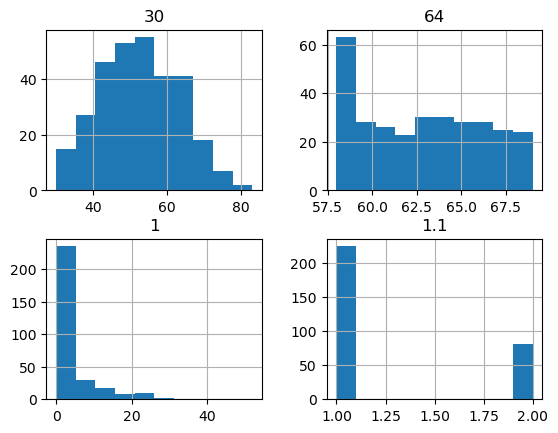

In [20]:
# show summary statistics and plots of the haberman dataset
from pandas import read_csv
from matplotlib import pyplot
# load the dataset
df = pd.read_csv("haberman.csv")
# show summary statistics
print(df.describe())
# plot histograms
df.hist()
pyplot.show()

In [21]:
df.head(5)

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [22]:
# summarize the class ratio of the haberman dataset
from pandas import read_csv
from collections import Counter
# define the dataset column names
columns = ['age', 'year', 'nodes', '1.1']
# load the csv file as a data frame
df = pd.read_csv("haberman.csv")
# summarize the class distribution
target = df['1.1'].values
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1, Count=224, Percentage=73.443%
Class=2, Count=81, Percentage=26.557%


In [23]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=3)

In [28]:
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

C:\Users\hlakh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# fit the model
history = model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=0, validation_data=(X_test,y_test))

In [30]:
y_probs = model.predict(X_test)
yhat = (y_probs > 0.5).astype(int)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [31]:
from sklearn.metrics import accuracy_score

In [32]:
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)

Accuracy: 0.732


In [33]:
import matplotlib.pyplot as plt

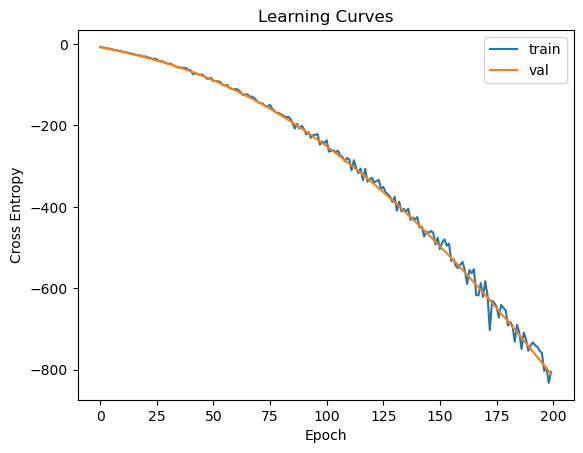

In [34]:
# plot learning curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

C:\Users\hlakh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002D60EB39F80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Accuracy: 0.745


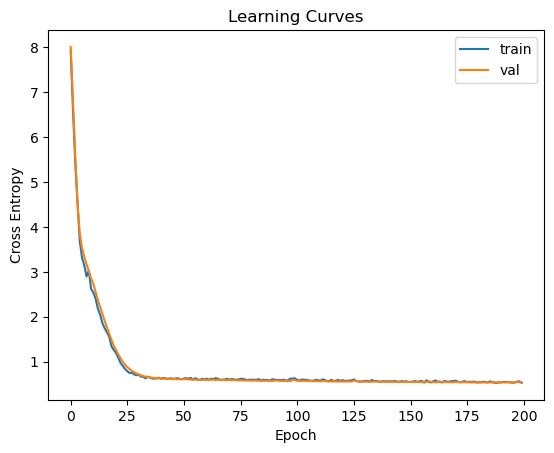

In [37]:
# fit a simple mlp model on the haberman and review learning curves
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
# load the dataset
df = pd.read_csv("haberman.csv", header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=3)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')
# fit the model
history = model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=0, validation_data=(X_test,y_test))
# predict test set
yhat = (model.predict(X_test) > 0.5).astype("int32")
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
# Convertir les prédictions en classes (0 ou 1 dans votre cas)
y_pred_classes = (y_pred > 0.5).astype(int)

# Calculer la précision
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

# Afficher la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Accuracy: 0.7450980392156863
Confusion Matrix:
[[109   3]
 [ 36   5]]


Prédictions :
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]

Distribution des classes dans les prédictions :
0    145
1      8
Name: count, dtype: int64


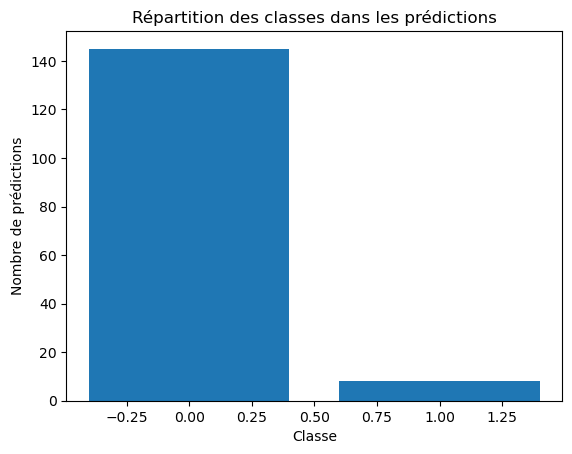


Exactitude manuelle : 108.2875816993464


In [56]:
# 1. Examinez les prédictions
print("Prédictions :")
print(yhat)
# 2. Analysez la distribution des classes
class_distribution = pd.Series(yhat.flatten()).value_counts()
print("\nDistribution des classes dans les prédictions :")
print(class_distribution)

# 3. Visualisez les résultats
import matplotlib.pyplot as plt
plt.bar(class_distribution.index, class_distribution.values)
plt.xlabel('Classe')
plt.ylabel('Nombre de prédictions')
plt.title('Répartition des classes dans les prédictions')
plt.show()

# 4. Calculez l'exactitude manuellement
correct_predictions = (yhat == y_test).sum()
total_predictions = len(y_test)
accuracy = correct_predictions / total_predictions
print("\nExactitude manuelle :", accuracy)

In [57]:
from sklearn.model_selection import KFold

In [58]:
import numpy as np

In [59]:
from numpy import mean, std

In [60]:
# prepare cross validation
kfold = KFold(10)
# enumerate splits
scores = list()
for train_ix, test_ix in kfold.split(X, y):
	# fit and evaluate the model...
	...
...
# summarize all scores
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: nan (nan)


In [61]:
# k-fold cross-validation of base model for the haberman dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# prepare cross validation
kfold = StratifiedKFold(10, random_state=1)
# enumerate splits
scores = list()
for train_ix, test_ix in kfold.split(X, y):
	# split data
	X_train, X_test, y_train, y_test = X[train_ix], X[test_ix], y[train_ix], y[test_ix]
	# determine the number of input features
	n_features = X.shape[1]
	# define model
	model = Sequential()
	model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
	model.add(Dense(1, activation='sigmoid'))
	# compile the model
	model.compile(optimizer='adam', loss='binary_crossentropy')
	# fit the model
	model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=0)
	# predict test set
	yhat = model.predict_classes(X_test)
	# evaluate predictions
	score = accuracy_score(y_test, yhat)
	print('>%.3f' % score)
	scores.append(score)
# summarize all scores
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.